# WELL NOTEBOOK
## Well logs visualization &amp; petrophysics

Install the the repository reservoirpy from github and import the required packages

In [1]:
import os
path = os.path.abspath(os.path.join('..','..','..'))
import sys
sys.path.append(path)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import folium
from pyproj import Proj, transform, CRS, Transformer

from reservoirpy.wellpy import path as ph


### Well atributes

Well atributes, name, rte, coordinates, survey

In [2]:
deviation = pd.read_csv('survey.csv', header=[0])
deviation.head()

,md,inc,azi
0,0.0,0.00,0.0
1,193.0,0.06,0.0
2,375.0,0.12,0.0
3,559.0,0.33,347.6
4,651.0,0.36,340.5


In [3]:
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[5000,5100],'md_bottom':[5099,5145]})
tops1

,md_top,md_bottom
formation,,
fm1,5000,5099
fm2,5100,5145


In [4]:
#Create the well object
name1 = 'well-1'
rte1 = 1515.78 # Rotary table Elevation
surf_coord1 = [1000000,1000000]#Point(1000100,1000000,520)
crs1 = 'EPSG:3117'
tops1 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation1 = deviation.copy()
deviation1['azi'] = deviation1['azi'] + 0

w1 = ph.well(name=name1, 
             rte=rte1, 
             surf_coord=surf_coord1, 
             survey = deviation1,
             tops=tops1,
             crs=crs1)


#Create the well object
name2 = 'well-2'
rte2 = 515 # Rotary table Elevation
surf_coord2 = Point(1000100,1000000)
crs2 = 'EPSG:3117'
tops2 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation2 = deviation.copy()
deviation2['azi'] = deviation1['azi'] + 0

w2 = ph.well(name=name2, 
             rte=rte2, 
             surf_coord=surf_coord2,
             survey = deviation2,
             tops=tops2,
             crs=crs2)


#Create the well object
name3 = 'well-3'
rte3 = 515 # Rotary table Elevation
surf_coord3 = Point(1000500,1000000)
crs3 = 'EPSG:3117'
tops3 = ph.tops({'formation':['fm1','fm2'],'md_top':[12000,12100],'md_bottom':[12099,12145]})
deviation3 = deviation.copy()
deviation3['azi'] = deviation1['azi'] + 30

w3 = ph.well(name=name3, 
             rte=rte3, 
             surf_coord=surf_coord3,
             survey = deviation3,
             tops=tops3,
             crs=crs3)

In [5]:
w3.surf_coord.x

1000500.0

## Create an empty wells group

In [6]:
g1 = ph.wells_group(w1)

In [7]:
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7faa3dac2590>}

In [8]:
g1.add_well(w2,w3)
g1.wells

{'well-1': <reservoirpy.wellpy.path.wells.well at 0x7faa3dac2590>,
 'well-2': <reservoirpy.wellpy.path.wells.well at 0x7faa559faa10>,
 'well-3': <reservoirpy.wellpy.path.wells.well at 0x7faa3daedf10>}

In [9]:
g1.wells['well-3'].surf_coord.wkt

'POINT (1000500 1000000)'

In [20]:
dist = g1.wells_distance(dims=['y','z','x'])
dist

,well-1,well-2,well-3
well-1,0.000000,321.010943,585.703018
well-2,321.010943,0.000000,400.000000
well-3,585.703018,400.000000,0.000000


In [11]:
m = g1.wells_map(zoom=13)
m

In [21]:
g1.wells_coordinates()

,x,y,z,geometry,lon,lat
well-1,1000000.0,1000000.0,462.009744,POINT (-71.07751 4.59620),-71.077508,4.5962
well-2,1000100.0,1000000.0,156.972000,POINT (-71.07661 4.59620),-71.076607,4.5962
well-3,1000500.0,1000000.0,156.972000,POINT (-71.07300 4.59620),-71.073002,4.5962


In [22]:
g1.formation_distance(wells=['well-1','well-2','well-3'],formation='fm2', dims=['tvdss_top'])

well,well-1,well-2,well-3
well,,,
well-1,0.000000,305.037744,305.037744
well-2,305.037744,0.000000,0.000000
well-3,305.037744,0.000000,0.000000


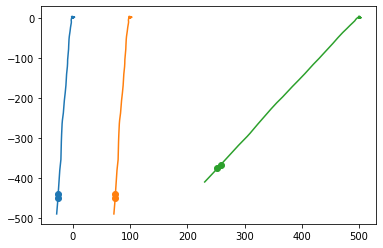

In [14]:
fig, ax = plt.subplots()

for i in g1.wells:
    _t = g1.wells[i].tops
    _s = g1.wells[i].survey
    ax.scatter(_t['easting']-1000000,_t['northing']-1000000)
    ax.plot(_s['easting']-1000000,_s['northing']-1000000)

In [15]:
azi= 45

tops, center = g1.wells_tops(projection1d=True, azi=azi)
surv,ce = g1.wells_surveys(projection1d=True, azi=azi, center=center)

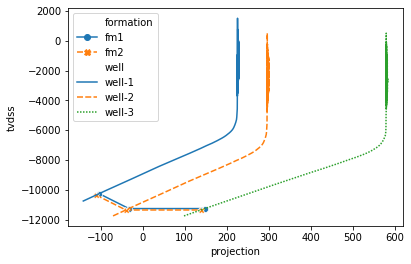

In [16]:
fig, ax =  plt.subplots()
sns.lineplot(x='projection',y='tvdss_top', data=tops, 
                hue='formation', style='formation',markers=True, ax=ax)

sns.lineplot(x='projection',y='tvdss', data=surv, 
                hue='well', style='well', ax=ax)